Example showing how to use LORA models from Local

https://huggingface.co/docs/datasets/en/image_dataset#imagefolder

In [1]:
import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import gc
from random import SystemRandom
randr = SystemRandom()
from IPython.display import clear_output

In [2]:
model_path='stabilityai/stable-diffusion-2-1'
lora_path='./models/lora_1_5/potion_lora/idle_Potion_Generator.safetensors'

In [2]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/fantasy_sword/fantasysword-13.safetensors'

In [2]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/game_building/GameIconResearch_build_Lora.safetensors'

In [7]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/heroes_of_my_might_magic/HOMM5_portrait_v1.safetensors'

In [3]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/tejag_potions/tejag_potions_3.safetensors'

In [5]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/tejag_crystal_1.safetensors'

In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
def disabled_safety_checker(images, clip_input):
    if len(images.shape)==4:
        num_images = images.shape[0]
        return images, [False]*num_images
    else:
        return images, False
pipe.safety_checker = disabled_safety_checker

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [7]:
pipe.load_lora_weights(lora_path, use_safetensors=True)
#pipe.unet.load_attn_procs(lora_path)

/home/tejag/projects/howdy_notebook/venv/lib/python3.11/site-packages/diffusers/loaders.py:1230: UserWarning: You have saved the LoRA weights using the old format. To convert the old LoRA weights to the new format, you can first load them in a dictionary and then create a new dictionary like the following: `new_state_dict = {f'unet'.{module_name}: params for module_name, params in old_state_dict.items()}`.
  warnings.warn(warn_message)


In [39]:
if False:
    pipe.unload_lora_weights()

In [26]:
#prompt = """a single spherical glass bottle containing green magical potion, bubbles in potion, pixel perfect, game asset"""
prompt = """a single blue thin long crystalline mineral stone floating in the air, pixel perfect, game asset"""
neg_prompt = "low quality, watermark, text"

Generating with seed = 1428639717355633953


  0%|          | 0/20 [00:00<?, ?it/s]

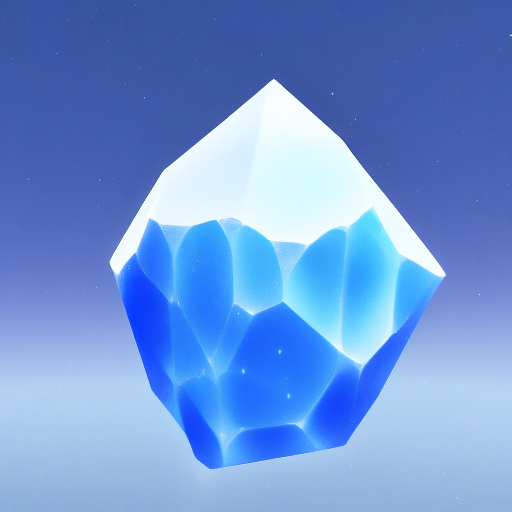

In [28]:
seed = randr.randrange(0xFFFFFFFFFFFFFFFF)
# seed = 1189920695906613833
print(f'Generating with seed = {seed}')
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt, negative_prompt=neg_prompt, width=512, height=512, num_inference_steps=20, generator=generator).images[0]
image

In [24]:
#randr.randrange(0xFFFFFFFFFFFFFFFF)

import requests
from PIL import Image
from io import BytesIO
from math import ceil

def flex_grid(imgs, cols):
  rows=ceil(len(imgs)/cols)

  w, h = imgs[0].size
  grid = Image.new('RGB', size=(cols*w, rows*h))

  for i, img in enumerate(imgs):
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

Generating 8 of 8 with seed = 10955497319431002380


  0%|          | 0/30 [00:00<?, ?it/s]

0: 5122014955150874704, 1: 3221717433548901735, 2: 15748768490705945827, 3: 7405258317508468236, 4: 16262693517624359018, 5: 13868575258840622314, 6: 4580813492970757607, 7: 10955497319431002380


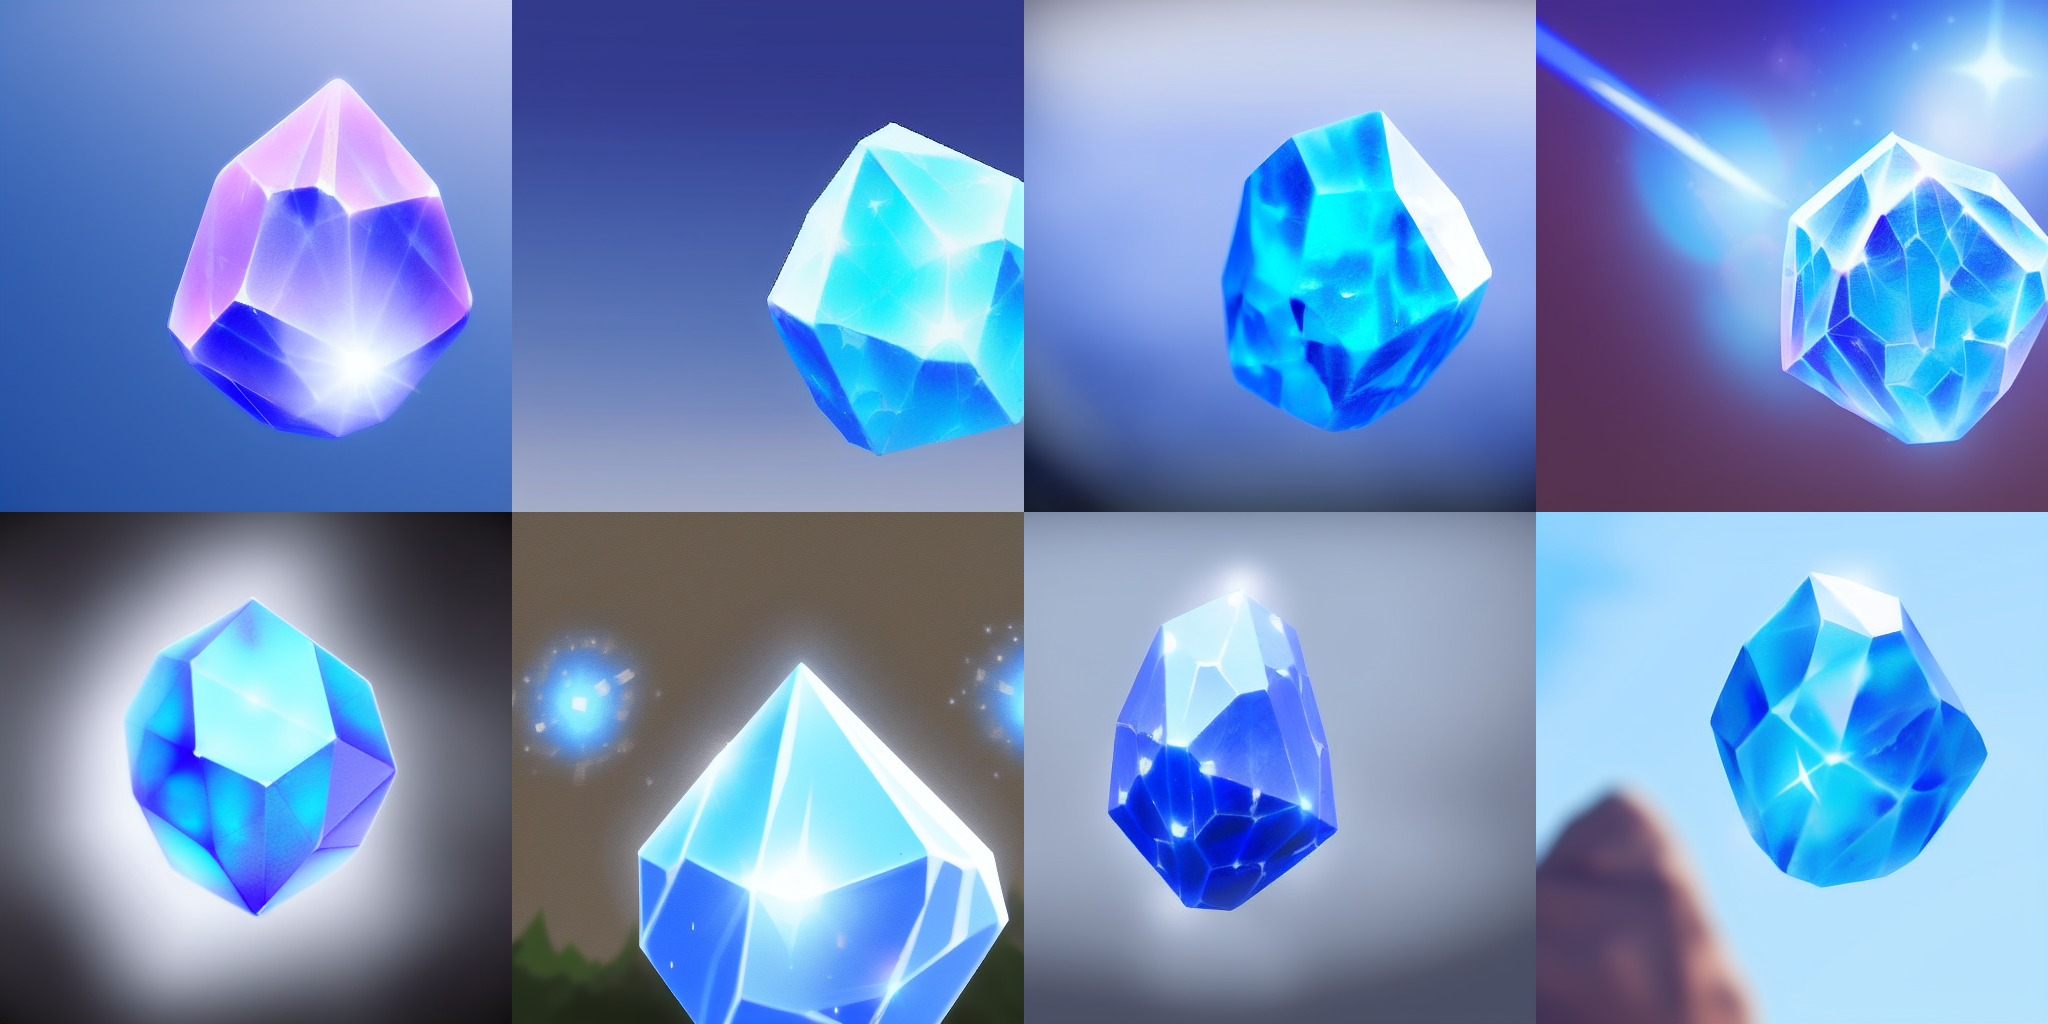

In [25]:
num_cols = 4
num_images = 8

seeds=[]
images = []
for i in range(num_images):
    seed = randr.randrange(0xFFFFFFFFFFFFFFFF)
    clear_output()
    seeds.append(seed)
    print(f'Generating {i + 1} of {num_images} with seed = {seed}')
    generator = torch.Generator("cuda").manual_seed(seed)
    images.extend(pipe(prompt, negative_prompt=neg_prompt, num_inference_steps=30, generator=generator).images)

print(', '.join(list(map(lambda x: f'{x[0]}: {x[1]}', enumerate(seeds)))))
grid = flex_grid(images, cols=num_cols)
grid

In [18]:
if 'grid' in globals():
    del grid
if 'images' in globals():
    del images
if 'image' in globals():
    del image
if 'pipe' in globals():
    del pipe
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |   8211 GiB |
|       from small pool |      0 KiB |     81 MiB |    162 GiB |    162 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |

In [19]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |   8211 GiB |
|       from small pool |      0 KiB |     81 MiB |    162 GiB |    162 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |

In [1]:
import safetensors.torch as t

In [2]:
model = t.load_file('./models/lora_1_5/game_building/GameIconResearch_build_Lora.safetensors')

In [5]:
model.keys()

dict_keys(['lora_te_text_model_encoder_layers_0_mlp_fc1.alpha', 'lora_te_text_model_encoder_layers_0_mlp_fc1.lora_down.weight', 'lora_te_text_model_encoder_layers_0_mlp_fc1.lora_up.weight', 'lora_te_text_model_encoder_layers_0_mlp_fc2.alpha', 'lora_te_text_model_encoder_layers_0_mlp_fc2.lora_down.weight', 'lora_te_text_model_encoder_layers_0_mlp_fc2.lora_up.weight', 'lora_te_text_model_encoder_layers_0_self_attn_k_proj.alpha', 'lora_te_text_model_encoder_layers_0_self_attn_k_proj.lora_down.weight', 'lora_te_text_model_encoder_layers_0_self_attn_k_proj.lora_up.weight', 'lora_te_text_model_encoder_layers_0_self_attn_out_proj.alpha', 'lora_te_text_model_encoder_layers_0_self_attn_out_proj.lora_down.weight', 'lora_te_text_model_encoder_layers_0_self_attn_out_proj.lora_up.weight', 'lora_te_text_model_encoder_layers_0_self_attn_q_proj.alpha', 'lora_te_text_model_encoder_layers_0_self_attn_q_proj.lora_down.weight', 'lora_te_text_model_encoder_layers_0_self_attn_q_proj.lora_up.weight', 'lora_t